# ASD Classification Using Machine Learning Techniques to Uncover Sociodemographic Risk Factors

* Edited @ 01/15/0225
*Md. Neaz Ali
*M.Sc in Statistics
*Dept. of Statistics
*Islamic University, Kushtia - 7003, Bangladesh

In [ ]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
import os
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# Cloning the git repository
! git clone https://github.com/alimdneaz/Autism-Spectrum-Disorder-Classification

Cloning into 'Autism-Spectrum-Disorder-Classification'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 63 (delta 0), reused 63 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (63/63), 8.66 MiB | 11.45 MiB/s, done.


In [ ]:
# !mv Autism-Spectrum-Disorder-Classification/ASD_classification.ipynb .
!mv Autism-Spectrum-Disorder-Classification/Dataset_SPSS.sav .

In [ ]:
try:
  df = pd.read_spss("./Dataset_SPSS.sav")
  print("Data set importing Completed...\n")
  print(f"Five sample of the dataset.. {df.sample(5)}\n")
except:
  print("Installing pyreadstat....")
  !pip install pyreadstat
  print("Installation completed\n")
  print("Importing the dataset..\n")
  df = pd.read_spss("./Dataset_SPSS.sav")
  print("Head of the dataset...\n")
  print(f"Five sample of the dataset. {df.sample(5)}")


Installing pyreadstat....
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 22.3 MB/s eta 0:00:00
Installation completed

Importing the dataset..

Head of the dataset...

Five sample of the dataset.      Gender   Birth_Weight Birth_order Premature_birth Birth_asphyxia  \
171    Male  Normal Weight  First Born              No             No   
517    Male     Low Weight  First Born              No             No   
334  Female     Low Weight  First Born              No             No   
590  Female  Normal Weight  Later Born              No             No   
78   Female  Normal Weight  First Born             Yes             No   

           BreastFeeding      Fathers_age         Mothers_age Socio_economic  \
171  More than 12 months     Less than 40      21 to 35 years         Higher   
517  More than 12 months     Less than 40  More than 35 years         Middle   
334  More than 12 months  Greater than 40      21 to 35 years         Middle   
590       6 to 12 months  Greater tha

# EDA

In [ ]:
# Print Basic Information of the dataset.
def basic_info(dataframe: pd.DataFrame):
  """
  Prints basic information about a Pandas DataFrame.

  Parameters:
  - dataframe: pd.DataFrame, the DataFrame to inspect

  Outputs:
  - Shape, Column Names, Data Types, Missing Values, and Summary
  """
  print(f"\n Basic Information:\n")
  print("-"*40)

  print(f"Shape: {dataframe.shape}")

  # Column Names and Data Types
  print("\nColumn Names and Data types:")
  print(dataframe.dtypes)

  # Checking for Missing Values
  print("\nMissing Values (Count per column)")
  print(dataframe.describe())

  # Basic Summary for Categorical Columns
  cat_columns = dataframe.select_dtypes(include = ["object", "category"]).columns
  if len(cat_columns):
    print("\nSummary Statistics (Categorical Data):")
    print(dataframe[cat_columns].describe())
  else:
    print("\nNo Categorical Columns Detected")
  # Display First 5 Rows
  print("\nFirst 5 rows of the DataFrame")
  print(dataframe.head())

In [ ]:
basic_info(df)


 Basic Information:

----------------------------------------
Shape: (597, 26)

Column Names and Data types:
Gender                  category
Birth_Weight            category
Birth_order             category
Premature_birth         category
Birth_asphyxia          category
BreastFeeding           category
Fathers_age             category
Mothers_age             category
Socio_economic          category
Fathers_education       category
Mothers_education       category
Fathers_occupation      category
Mothers_occupation      category
Family_type             category
Family_history          category
Father_illness          category
Consanguinity           category
Threatened_bortion      category
Mothers_illness         category
Drug_use                category
Stress                  category
Poor_nutrition          category
Vitamin_D_deficit       category
Mineral_deficiencies    category
Delivery_types          category
ASD                      float64
dtype: object

Missing Values (C

Image folder created..



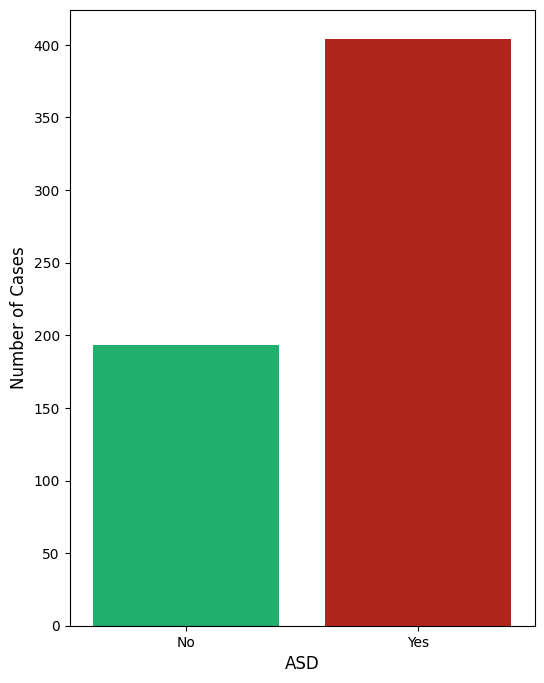

In [ ]:
import os
if "images" not in os.listdir():
  os.mkdir("images")
  print("Image folder created..\n")
else:
  print("images folder already exists..\n")
# ASD distribution
# Info of Dataset
ASD = df["ASD"].value_counts()
ASD = {
    "No": ASD[0],
    "Yes": ASD[1]
}
# Barplot of ASD of No and Yes Category
plt.figure(figsize=(6,8))
crest_palette = sns.color_palette("crest", as_cmap=False)
sns.barplot(x = ASD.keys(), y = ASD.values(), palette = ["#0ac76f", "#c91104"])
# plt.title("Bar plot of ASD", fontsize = 16)
plt.xlabel("ASD", fontsize = 12)
plt.ylabel("Number of Cases", fontsize = 12)
plt.savefig("./images/ASD_image", dpi = 600)
plt.show()

In [ ]:
# Ordinal and Nominal Variables
ordinal_vars = ['Birth_order', 'BreastFeeding', 'Fathers_age', 'Mothers_age', 'Socio_economic', 'Fathers_education', 'Mothers_education',
                'Family_type', 'Delivery_types']
nominal_vars = ['Gender', 'Birth_Weight', 'Premature_birth', 'Birth_asphyxia', 'Fathers_occupation', 'Mothers_occupation', 'Family_history',
                 'Father_illness', 'Consanguinity', 'Threatened_bortion', 'Mothers_illness', 'Drug_use', 'Stress', 'Poor_nutrition', 'Vitamin_D_deficit', 'Mineral_deficiencies']

In [ ]:
# Length of ordinal and nominal vriables
print("Lenth of Ordinal Variables",len(ordinal_vars))
print("Length of Nominal Variables",len(nominal_vars))

Lenth of Ordinal Variables 9
Length of Nominal Variables 16


In [ ]:
# Seperation of Ordinal and Nominal Variables
X_ordinal = df[ordinal_vars]
X_nominal = df[nominal_vars]
y = df.ASD
X = df.drop("ASD",axis=1)

In [ ]:
# Ordinal Variables Ordering
ordinal_variable_orders = [
    ['First Born','Later Born'],
    ['Less than 6 months', '6 to 12 months', 'More than 12 months'],
    ['Less than 40', 'Greater than 40'],
    ['Less than 21 years', '21 to 35 years', 'More than 35 years'],
    ['Low', 'Middle', 'Higher'],
    ['Secondary level', 'Higher secondary level', 'Higher education', 'Graduation'],
    ['Secondary level', 'Higher secondary level', 'Higher education', 'Graduation'],
    ['Nuclear family', 'Joint family'],
    ['Cesarean section', 'Vaginal delivery']
]

In [ ]:
# Libraries for data encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# Lebel encoder for target variable
le = LabelEncoder()
y = le.fit_transform(y)
# One hot encoding for nominal variables
ohe = OneHotEncoder(drop="first",sparse_output=False)
# Fit and Transforming nominal variables
X_ohe = ohe.fit_transform(X_nominal)
# ohe.feature_name_combiner
features_name = ohe.get_feature_names_out()
# Creating Dataframe of New transformed nominal features
df_nominal = pd.DataFrame(X_ohe,columns = features_name)

In [ ]:
# Ordinal Ecoding for Ordinal features
oe = OrdinalEncoder(categories=ordinal_variable_orders)
X_oe = oe.fit_transform(X_ordinal)
# Creating dataframe for transformed ordianl varibles
df_ordinal = pd.DataFrame(X_oe,columns=ordinal_vars)

In [ ]:
# Creating dataframs after encoding all the featues
df2 = pd.concat([df_ordinal,df_nominal,pd.Series(y, name = "ASD")],axis=1)

In [ ]:
df2.sample(5)

,Birth_order,BreastFeeding,Fathers_age,Mothers_age,Socio_economic,Fathers_education,Mothers_education,Family_type,Delivery_types,Gender_Male,...,Consanguinity_Not related,Threatened_bortion_Yes,Mothers_illness_No,Mothers_illness_Others,Drug_use_Yes,Stress_Yes,Poor_nutrition_Yes,Vitamin_D_deficit_Yes,Mineral_deficiencies_Yes,ASD
141,0.0,2.0,0.0,1.0,1.0,3.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1
387,0.0,1.0,0.0,1.0,1.0,3.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1
267,0.0,2.0,0.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1
243,0.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1
37,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1


# Hyper parameter tuning and fine tuning of the model

In [ ]:
# Libraries for calculating the metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, roc_curve, auc, log_loss

In [ ]:
# Function for Performance metrics
def model_report(y_act, y_pred, algorithm):

    images_folder = "images"  # Specify the desired folder name

    # Create the "images" folder if it doesn't exist
    if not os.path.exists(images_folder):
        os.mkdir(images_folder)

    print("Accuracy = ", accuracy_score(y_act, y_pred))
    print("Precision = " ,precision_score(y_act, y_pred,average='weighted'))
    print("Recall\Sensitivity = " ,recall_score(y_act, y_pred,average='weighted'))
    confusion = metrics.confusion_matrix(y_act, y_pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    specificity = TN / (TN + FP)
    print("Specificity = " ,specificity)
    print("F1 Score = " ,f1_score(y_act, y_pred,average='weighted'))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_act, y_pred)
    print("AUC Score =", auc(false_positive_rate, true_positive_rate))
    print("Kappa score = ",cohen_kappa_score(y_act,y_pred))
    print("Log Loss = " ,log_loss(y_act, y_pred),"\n")
    # print(classification_report(y_act,y_pred))

    plt.figure(figsize=(6,4))
    plt.title(f"Confusion Matrix of {algorithm}")
    sns.heatmap(confusion,annot=True,fmt="d",cmap="Greys")
    plt.xlabel("Predicted")
    plt.ylabel("Truth")
    plt.savefig(os.path.join(images_folder, f"{algorithm} confusion.png"), dpi=600)

In [ ]:
# Roc Curve
def plot_roc_curve(clf, X_test, y_test, figsize=(8, 6), RFC=False , algorithm = None):
    images_folder = "images"  # Specify the desired folder name

    # Create the "images" folder if it doesn't exist
    if not os.path.exists(images_folder):
        os.mkdir(images_folder)


    # Get class probabilities or decision function scores
    if RFC:
        y_score = clf.predict_proba(X_test)[:, 1]  # Use probabilities for positive class
    else:
        y_score = clf.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    fig, ax = plt.subplots(figsize=figsize)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic of {algorithm}')
    plt.plot(fpr, tpr)
    plt.grid(alpha=0.4)
    plt.savefig(os.path.join(images_folder, f"{algorithm} roc_curve.png"), dpi=600)
    plt.show()

In [ ]:
# Library loading for train-test split and Normalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  Normalizer


X,y = df2.drop("ASD", axis = 1), df2.ASD
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, stratify=y,random_state=42)

# Normalization
normalizer = Normalizer()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)
print(X_train_norm.shape, y_train.shape)

(417, 29) (417,)


In [ ]:
pd.DataFrame(X_train_norm).head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.000000,0.204124,0.000000,0.204124,0.204124,0.612372,0.204124,0.204124,0.000000,0.204124,...,0.204124,0.204124,0.0,0.204124,0.0,0.000000,0.204124,0.204124,0.204124,0.204124
1,0.204124,0.204124,0.204124,0.408248,0.204124,0.408248,0.408248,0.000000,0.000000,0.204124,...,0.000000,0.204124,0.0,0.204124,0.0,0.000000,0.000000,0.000000,0.204124,0.204124
2,0.000000,0.359211,0.000000,0.179605,0.179605,0.538816,0.538816,0.000000,0.000000,0.000000,...,0.000000,0.179605,0.0,0.179605,0.0,0.179605,0.179605,0.000000,0.000000,0.000000
3,0.235702,0.471405,0.000000,0.471405,0.235702,0.000000,0.000000,0.000000,0.235702,0.235702,...,0.000000,0.235702,0.0,0.235702,0.0,0.000000,0.000000,0.000000,0.235702,0.000000
4,0.000000,0.353553,0.000000,0.000000,0.353553,0.530330,0.530330,0.000000,0.176777,0.000000,...,0.000000,0.000000,0.0,0.176777,0.0,0.000000,0.176777,0.000000,0.000000,0.000000


In [ ]:
# Loading Libraries for necessary ML algorithms and model selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Hyper parameter grid for Decision Tree
param_grid_dt = {
    "criterion" : ["gini","entropy","log_loss"],
    "splitter" : ["best","random"],
    "min_samples_split" : [int(x) for x in np.linspace(1, 1000, 10)],
    "max_features" : [None,"auto","sqrt","log2"]
}
# Decision Tree object
model_dt = tree.DecisionTreeClassifier()
grid_search_dt = GridSearchCV( model_dt, param_grid_dt, cv = 5, scoring="accuracy")

# Perform Grid Search
grid_search_dt.fit(X_train_norm, y_train)

# Get the best model and its parameters
best_model_dt = grid_search_dt.best_estimator_
best_params_dt = grid_search_dt.best_params_

best_model_score = best_model_dt.score(X_test_norm,y_test)
print("Best Params: ", best_params_dt)

Best Params:  {'criterion': 'gini', 'max_features': None, 'min_samples_split': 112, 'splitter': 'best'}


Accuracy =  0.9833333333333333
Precision =  0.9837333333333333
Recall\Sensitivity =  0.9833333333333333
Specificity =  0.9482758620689655
F1 Score =  0.9832133089701791
AUC Score = 0.9741379310344828
Kappa score =  0.9613180515759312
Log Loss =  0.6007275564852861 



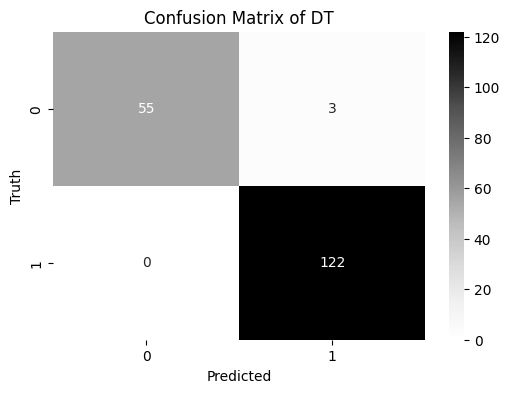

In [ ]:
# Best model of Decision Tree based on best hyper parameters
model_dt_final = tree.DecisionTreeClassifier(criterion = 'entropy', max_features = None, min_samples_split = 2, splitter = 'best')
# Fitting the model
model_dt_final.fit(X_train_norm, y_train)
# Predicting using the
y_pred_dt = model_dt_final.predict(X_test_norm)
# Model evaluation
model_report(y_test,y_pred_dt, "DT")

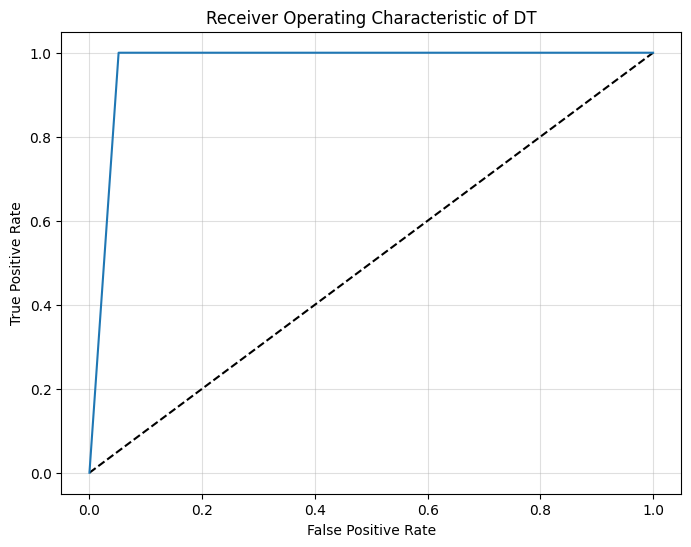

In [ ]:
plot_roc_curve(model_dt_final, X_test_norm, y_test,RFC = True ,algorithm='DT')

# Algo Decision Tree Extra Analysis

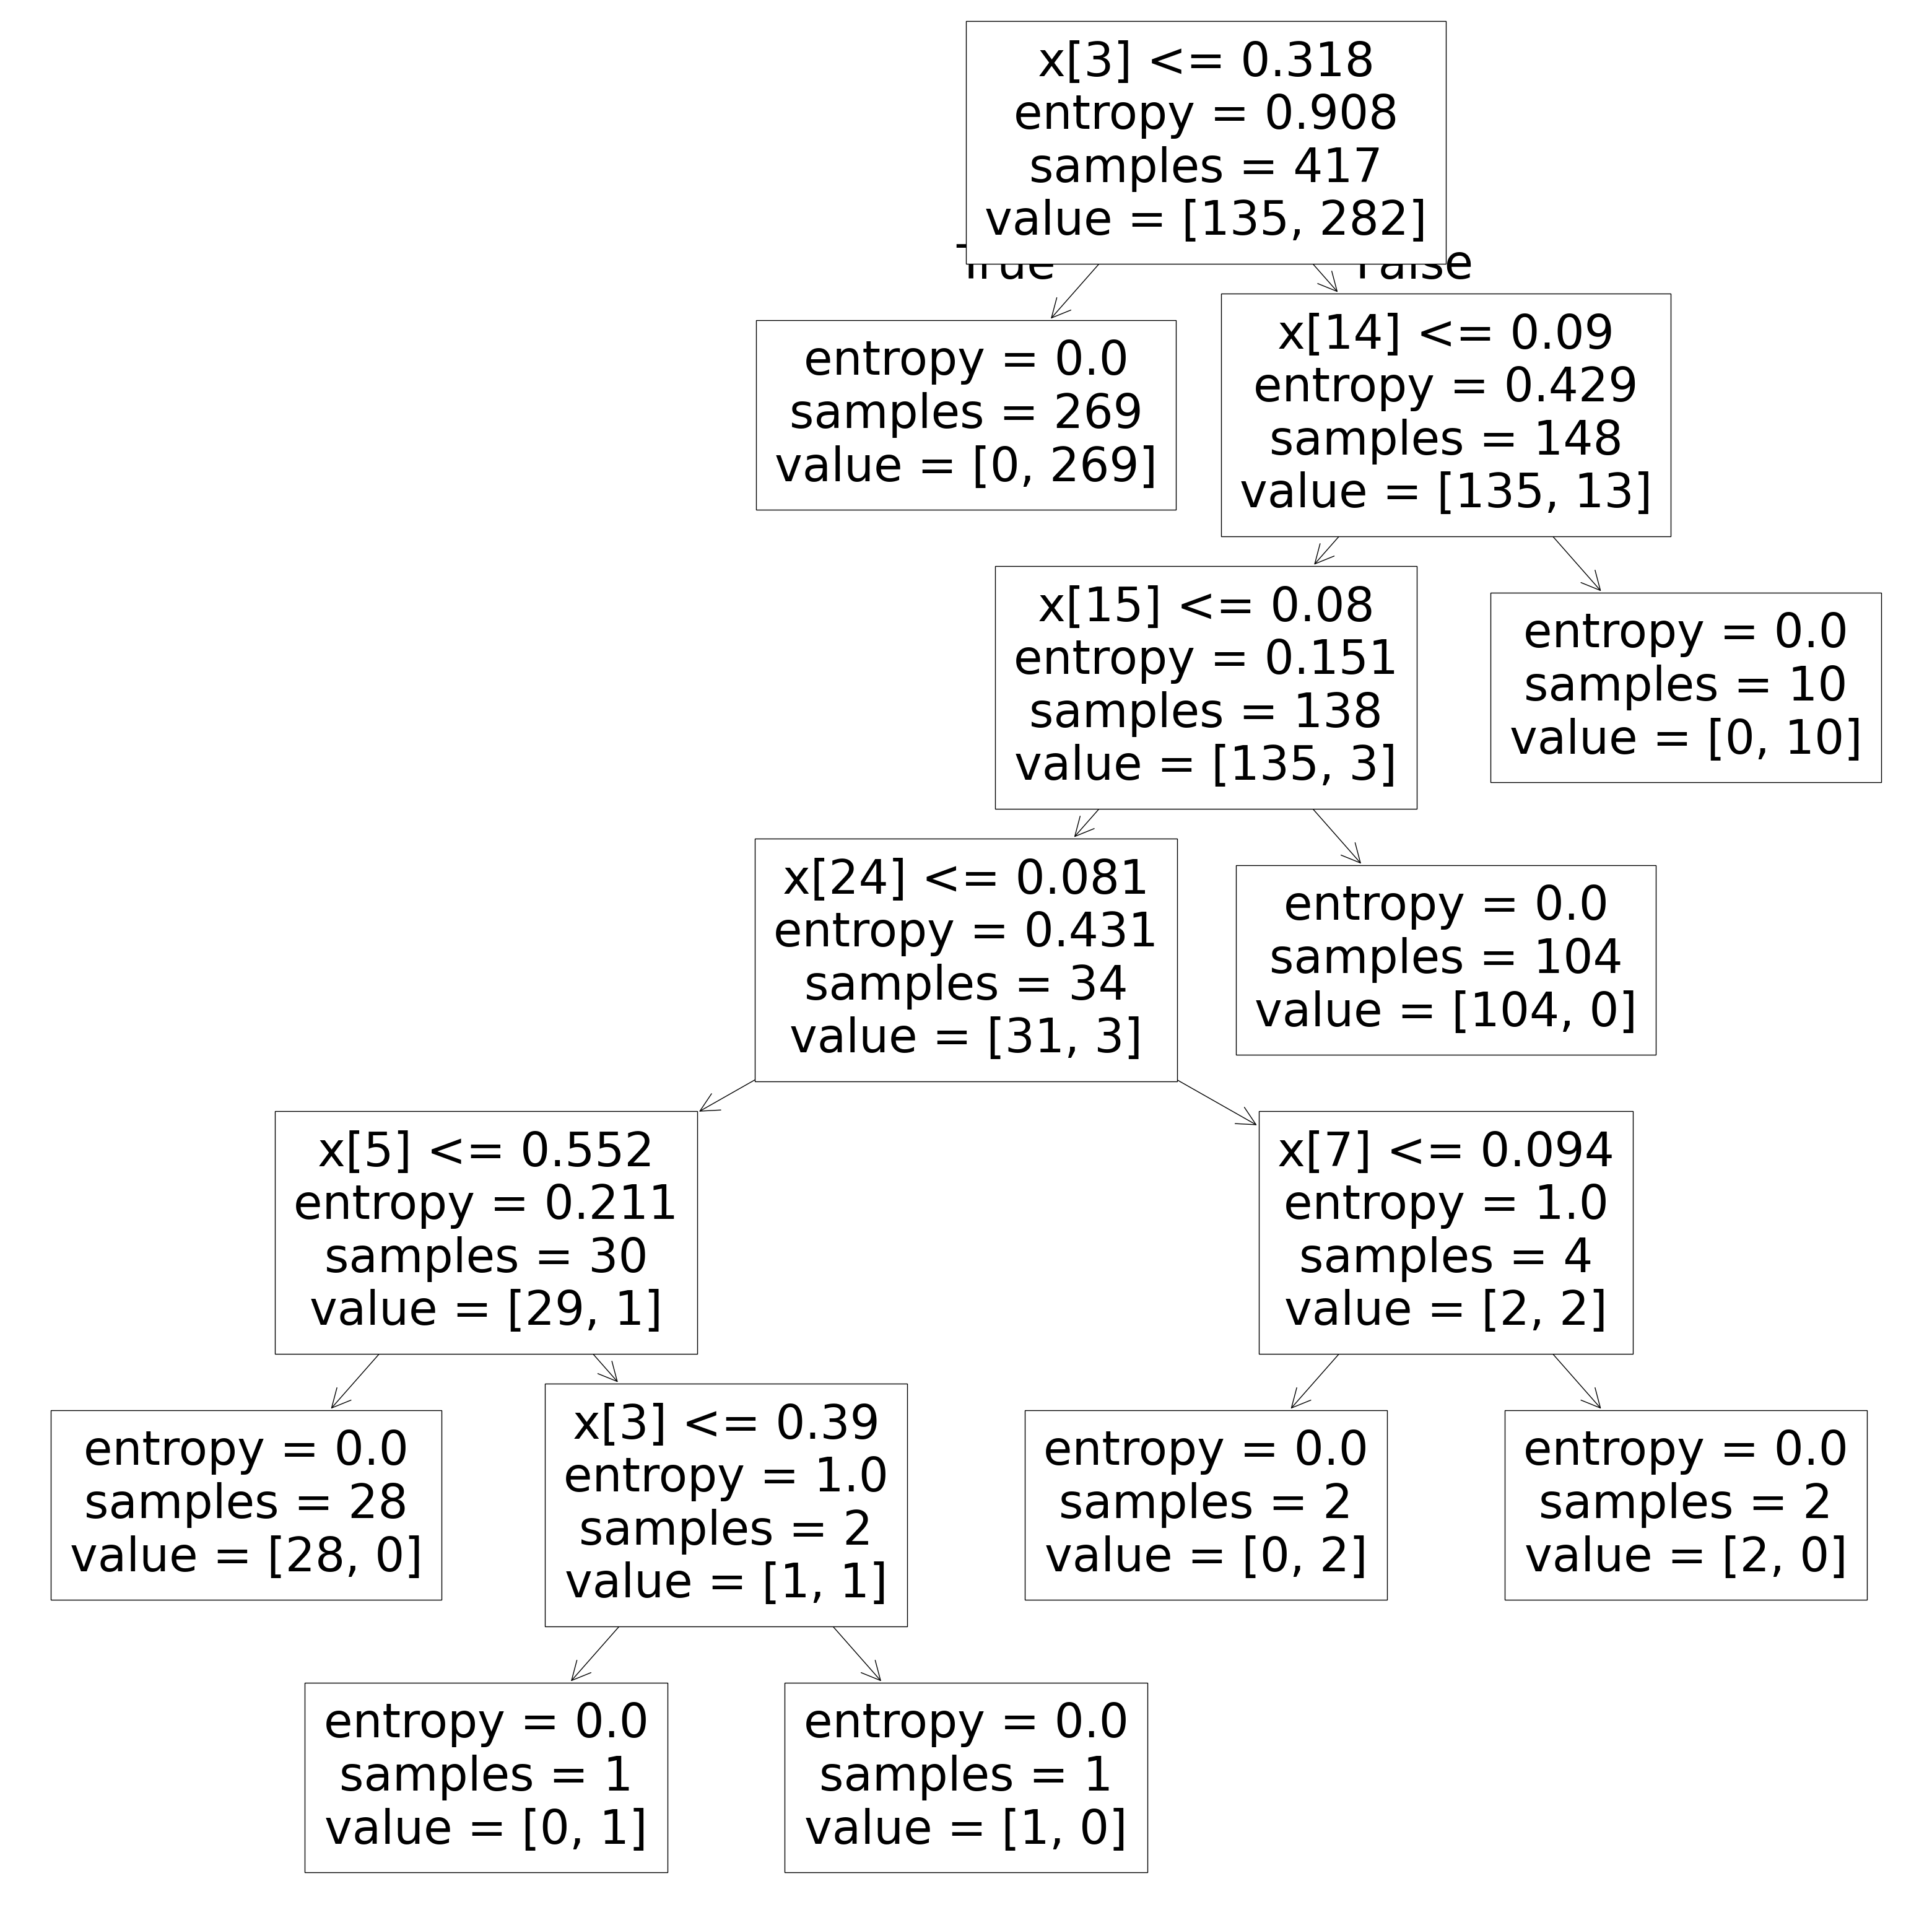

In [ ]:
# Ensure you're passing the classifier directly, not the tree attribute
from sklearn import tree
plt.figure(figsize=(40, 40))
tree.plot_tree(model_dt_final)
plt.savefig("./images/dt_decision_tree.png", dpi = 600)
plt.show()

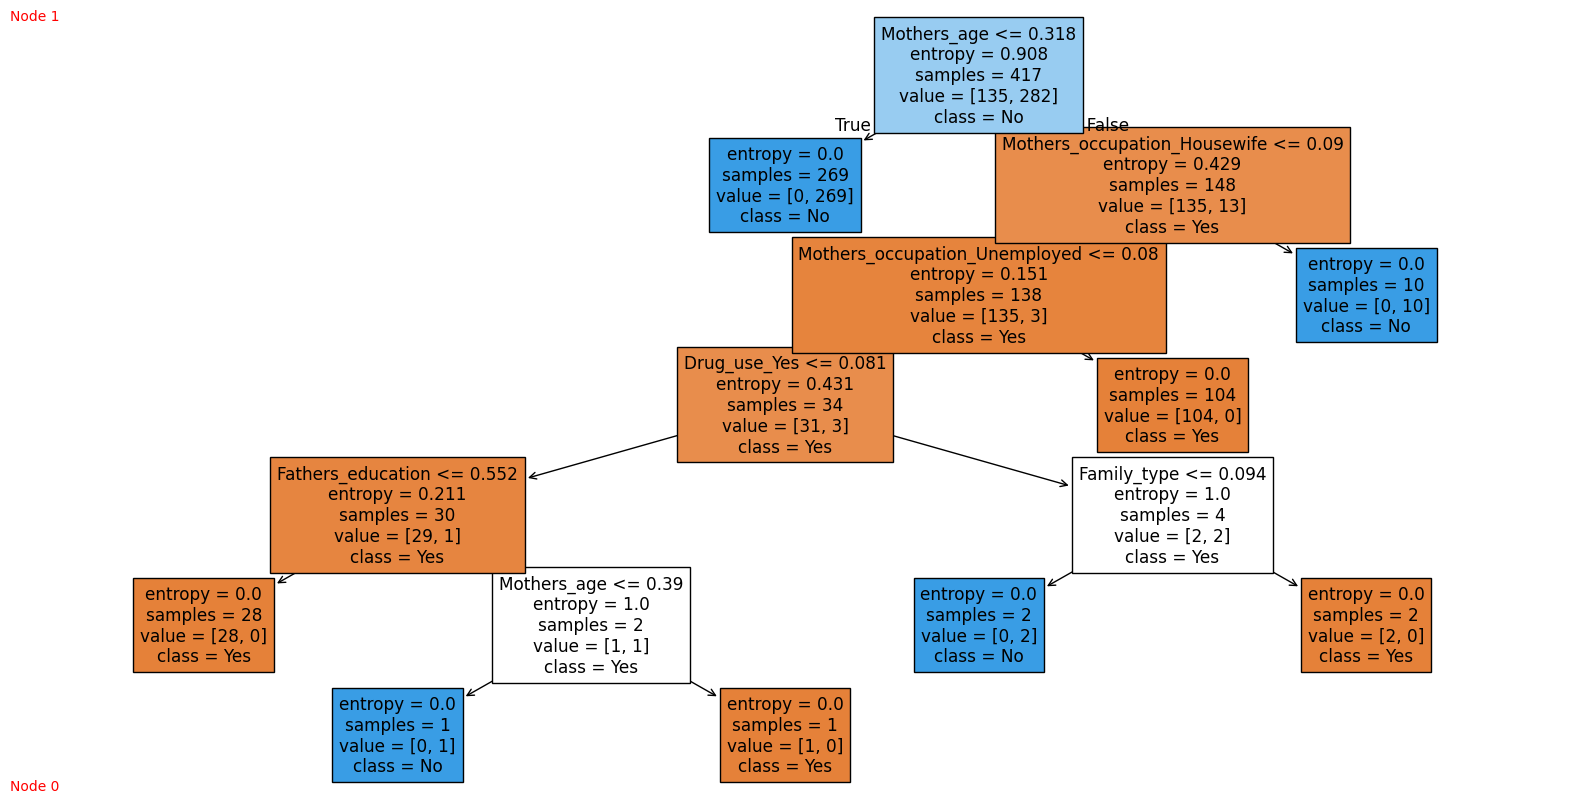

In [ ]:
sample_index = 0
X_sample = X_train_norm[[sample_index]]
y_sample = y_test.iloc[sample_index]

# Get the decision path and nodes visited
decision_path = model_dt_final.decision_path(X_sample)
node_indicator = decision_path.toarray().flatten()

# Plot the decision tree with nodes visited highlighted
plt.figure(figsize = (20, 10))
tree.plot_tree(model_dt_final, filled=True, feature_names=X_train.columns, class_names=["Yes", "No"])

# Highlight the path taken by the sample
for node_idx, node_visited in enumerate(node_indicator):
    if node_visited:
        plt.text(0, node_idx, f"Node {node_idx}", fontsize=10, color="red")

plt.show()

In [ ]:
dir(model_dt_final.tree_)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'apply',
 'capacity',
 'children_left',
 'children_right',
 'compute_feature_importances',
 'compute_node_depths',
 'compute_partial_dependence',
 'decision_path',
 'feature',
 'impurity',
 'max_depth',
 'max_n_classes',
 'missing_go_to_left',
 'n_classes',
 'n_features',
 'n_leaves',
 'n_node_samples',
 'n_outputs',
 'node_count',
 'predict',
 'threshold',
 'value',
 'weighted_n_node_samples']

In [ ]:
model_dt_final.tree_.weighted_n_node_samples

array([417., 269., 148., 138.,  34.,  30.,  28.,   2.,   1.,   1.,   4.,
         2.,   2., 104.,  10.])

In [ ]:
model_dt_final.tree_.threshold

array([ 0.31824203, -2.        ,  0.08980265,  0.08006407,  0.08111071,
        0.55240428, -2.        ,  0.38981949, -2.        , -2.        ,
        0.09449112, -2.        , -2.        , -2.        , -2.        ])

In [ ]:
feature_importances = model_dt_final.tree_.compute_feature_importances()

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
feature_importance_df

,Feature,Importance
3,Mothers_age,0.837586
14,Mothers_occupation_Housewife,0.112649
15,Mothers_occupation_Unemployed,0.016401
5,Fathers_education,0.011418
24,Drug_use_Yes,0.011387
7,Family_type,0.010560
17,Family_history_Sibling history of ASD,0.000000
27,Vitamin_D_deficit_Yes,0.000000
26,Poor_nutrition_Yes,0.000000
25,Stress_Yes,0.000000


In [ ]:
important_features = feature_importance_df[feature_importance_df["Importance"] > 0]

In [ ]:
features_selected = important_features["Feature"]
print(f"Selected Feature using DT: {features_selected}")
print(f"Selected Features number: {features_selected.shape}")

Selected Feature using DT: 3                       Mothers_age
14     Mothers_occupation_Housewife
15    Mothers_occupation_Unemployed
5                 Fathers_education
24                     Drug_use_Yes
7                       Family_type
Name: Feature, dtype: object
Selected Features number: (6,)


In [ ]:
# Hyper parameter grid for Decision Tree
param_grid_dt2 = {
    "criterion" : ["gini","entropy","log_loss"],
    "splitter" : ["best","random"],
    "min_samples_split" : [1,2,3,4,5],
    "max_features" : [None,"auto","sqrt","log2"]
}
# Decision Tree object
model_dt2 = tree.DecisionTreeClassifier()
grid_search_dt2 = GridSearchCV( model_dt, param_grid_dt, cv = 5, scoring="accuracy")

# Perform Grid Search
grid_search_dt2.fit(X_train[features_selected], y_train)

# Get the best model and its parameters
best_model_dt2 = grid_search_dt2.best_estimator_
best_params_dt2 = grid_search_dt2.best_params_

best_model_score2 = best_model_dt2.score(X_test[features_selected],y_test)
print("Best Params: ", best_params_dt2)

Best Params:  {'criterion': 'gini', 'max_features': None, 'min_samples_split': 112, 'splitter': 'best'}


Accuracy =  1.0
Precision =  1.0
Recall\Sensitivity =  1.0
Specificity =  1.0
F1 Score =  1.0
AUC Score = 1.0
Kappa score =  1.0
Log Loss =  2.2204460492503136e-16 



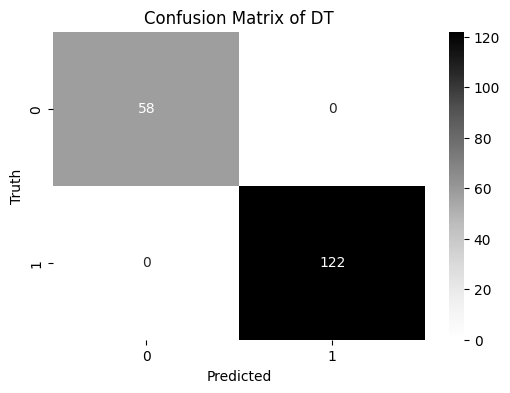

In [ ]:
# Best model of Decision Tree based on best hyper parameters
model_dt_final2 = tree.DecisionTreeClassifier(criterion = 'gini', max_features = None, min_samples_split = 112, splitter = 'best')
# Fitting the model
model_dt_final2.fit(X_train[features_selected], y_train)
# Predicting using the
y_pred_dt2 = model_dt_final2.predict(X_test[features_selected])
# Model evaluation
model_report(y_test,y_pred_dt2, "DT")

In [ ]:
# Hyper parameter Grid for SVM
c = [int(x) for x in np.linspace(1,100,10)]
d = [int(x) for x in np.linspace(3,10,10)]

param_grid_svm = {
    "C": c,
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"],
    "degree": d
}
# SVM object
model_svm = SVC()
# Grid Search
grid_search_svm = GridSearchCV(model_svm, param_grid_svm,cv = 5, scoring = "accuracy")
# Grid Search fit
grid_search_svm.fit(X_train[features_selected], y_train)
# Best Moel for SVM using Grid Search
best_model_svm = grid_search_svm.best_estimator_
# # Best parameter for SVM using Grid Search
best_model_params = grid_search_svm.best_params_

# best_mode_score = best_model_svm.score(X_test_norm,y_test)
# # Best Parameters
print("Best Params: ", best_model_params)

Best Params:  {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


Accuracy =  0.9833333333333333
Precision =  0.9837333333333333
Recall\Sensitivity =  0.9833333333333333
Specificity =  0.9482758620689655
F1 Score =  0.9832133089701791
AUC Score = 0.9741379310344828
Kappa score =  0.9613180515759312
Log Loss =  0.6007275564852861 



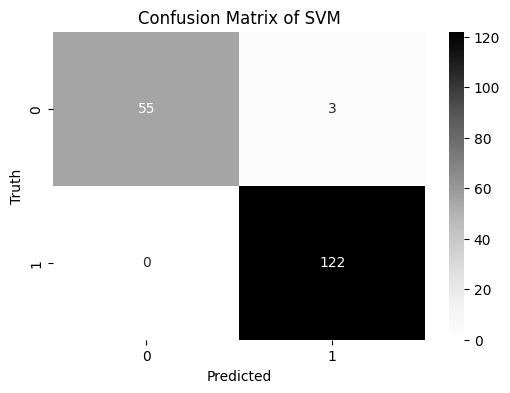

In [ ]:
# SVM model using the best parameters
model_svm_final = SVC(C = 1, degree=3, gamma= 'scale', kernel= 'poly')
# Fitting the model
model_svm_final.fit(X_train[features_selected], y_train)
# predicting using the fitted model
y_pred_svm = model_svm_final.predict(X_test[features_selected])
# model evaluation
model_report(y_test, y_pred_svm,"SVM")

In [ ]:
X_test[features_selected].shape

(180, 6)

In [ ]:
X_train[features_selected].shape, y

,Mothers_age,Mothers_occupation_Housewife,Mothers_occupation_Unemployed,Fathers_education,Drug_use_Yes,Family_type
331,1.0,1.0,0.0,3.0,0.0,1.0
434,2.0,0.0,0.0,2.0,0.0,0.0
131,1.0,0.0,0.0,3.0,1.0,0.0
429,2.0,0.0,1.0,0.0,0.0,0.0
135,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...
259,1.0,1.0,0.0,3.0,0.0,0.0
148,1.0,0.0,0.0,2.0,1.0,0.0
187,1.0,1.0,0.0,3.0,1.0,1.0
440,2.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
"""
num_bars = feature_importance_df.shape[0]

angles = np.linspace(0, 2 * np.pi, num_bars, endpoint=False).tolist()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})

# Create the bars
bars = ax.bar(angles, feature_importance_df["Importance"], width=0.3, bottom=0.0)

# Add category labels
ax.set_xticks(angles)  # Set the positions for the labels
ax.set_xticklabels(feature_importance_df["Feature"], fontsize=12)

# Customize appearance (optional)
ax.set_ylim(0, feature_importance_df["Importance"] + 1)  # Set the radial axis limit
ax.set_title("Radial Barplot", fontsize=16, va='bottom')

# Show the plot
plt.show()
"""

'\nnum_bars = feature_importance_df.shape[0]\n\nangles = np.linspace(0, 2 * np.pi, num_bars, endpoint=False).tolist()\n\n# Create the figure and axis\nfig, ax = plt.subplots(figsize=(6, 6), subplot_kw={\'projection\': \'polar\'})\n\n# Create the bars\nbars = ax.bar(angles, feature_importance_df["Importance"], width=0.3, bottom=0.0)\n\n# Add category labels\nax.set_xticks(angles)  # Set the positions for the labels\nax.set_xticklabels(feature_importance_df["Feature"], fontsize=12)\n\n# Customize appearance (optional)\nax.set_ylim(0, feature_importance_df["Importance"] + 1)  # Set the radial axis limit\nax.set_title("Radial Barplot", fontsize=16, va=\'bottom\')\n\n# Show the plot\nplt.show()\n'

<BarContainer object of 1 artists>

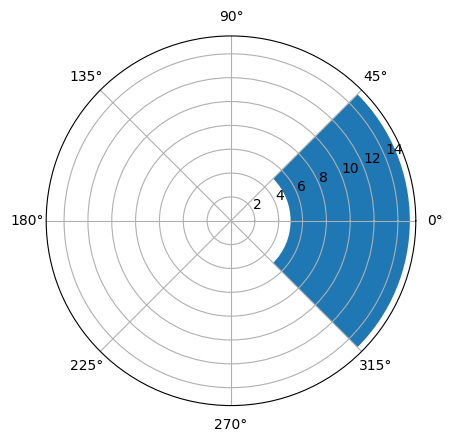

In [ ]:
plt.subplot(111, polar = True)
plt.bar(x = 0, height = 10, width = np.pi /2 , bottom = 5)

Angles: [0.21666156231653746, 0.43332312463307493, 0.6499846869496124, 0.8666462492661499, 1.0833078115826873, 1.2999693738992248, 1.5166309362157622, 1.7332924985322997, 1.9499540608488373, 2.1666156231653746, 2.383277185481912, 2.5999387477984497, 2.8166003101149872, 3.0332618724315243, 3.249923434748062, 3.4665849970645994, 3.683246559381137, 3.8999081216976745, 4.116569684014212, 4.333231246330749, 4.549892808647287, 4.766554370963824, 4.983215933280362, 5.199877495596899, 5.416539057913437, 5.6332006202299745, 5.849862182546511, 6.066523744863049, 6.283185307179586]


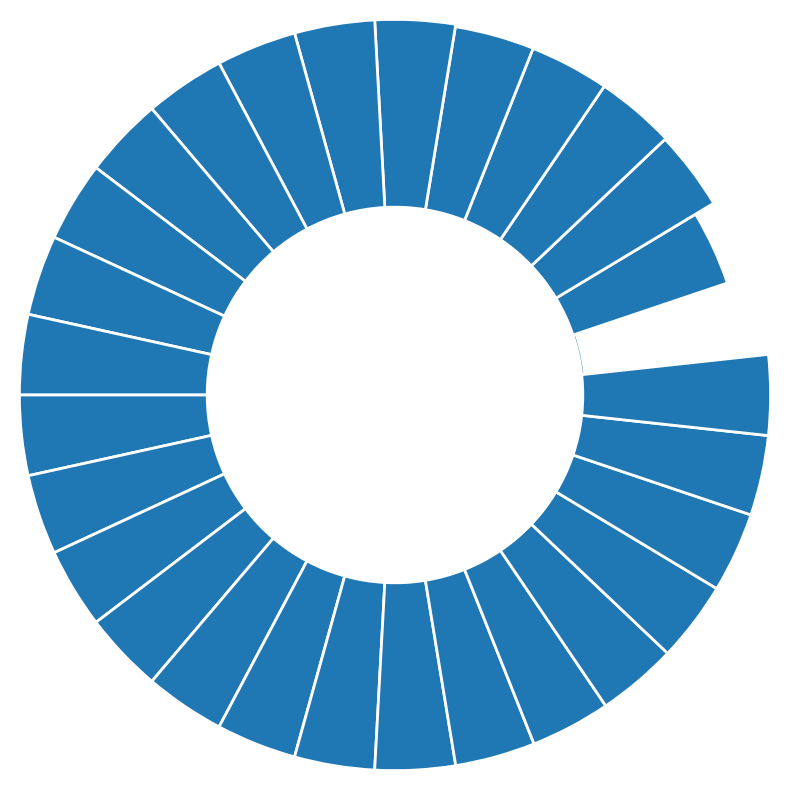

In [ ]:
plt.figure(figsize = (20, 10))
ax = plt.subplot(111, polar = True)
# Remove Grid
plt.axis("off")
# Set the coordinates limits
upperlimt = 500
lowerlimit = 50
# Compute max and min in the dataset
maxval = feature_importance_df["Importance"].max()

slop = (maxval - lowerlimit) / maxval

heights = slop * feature_importance_df["Importance"] + lowerlimit

width = 2 * np.pi / len(feature_importance_df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(feature_importance_df.index)+1))
angles = [element * width for element in indexes]
print(f"Angles: {angles}")

bars = ax.bar(
    x = angles,
    height = heights,
    width = width,
    bottom = lowerlimit,
    linewidth = 2,
    edgecolor = "white"
)

In [ ]:
feature_importance_df["Importance"].max()
feature_importance_df["Importance"].min()

0.0

In [ ]:
heights, slop

(3      0.837586
 14    43.388026
 15    49.037360
 5     49.329803
 24    49.331628
 7     49.380203
 17    50.000000
 27    50.000000
 26    50.000000
 25    50.000000
 23    50.000000
 22    50.000000
 21    50.000000
 20    50.000000
 19    50.000000
 18    50.000000
 0     50.000000
 16    50.000000
 1     50.000000
 13    50.000000
 12    50.000000
 11    50.000000
 10    50.000000
 9     50.000000
 8     50.000000
 6     50.000000
 4     50.000000
 2     50.000000
 28    50.000000
 Name: Importance, dtype: float64,
 -58.695394671593206)

In [ ]:
plt.figure(figsize = (20, 10))
ax = plt.subplot(111, polar = True)
# Remove Grid
plt.axis("off")
# Set the coordinates limits
upperlimt = 500
lowerlimit = 50
# Compute max and min in the dataset
maxval = X_train[].max()

slop = (maxval - lowerlimit) / maxval

heights = slop * feature_importance_df["Importance"] + lowerlimit

width = 2 * np.pi / len(feature_importance_df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(feature_importance_df.index)+1))
angles = [element * width for element in indexes]
print(f"Angles: {angles}")

bars = ax.bar(
    x = angles,
    height = heights,
    width = width,
    bottom = lowerlimit,
    linewidth = 2,
    edgecolor = "white"
)

In [ ]:
X_train["Fathers_age"]

,Fathers_age
331,0.0
434,1.0
131,0.0
429,0.0
135,0.0
...,...
259,0.0
148,0.0
187,1.0
440,0.0


In [ ]:
X_train.head()

,Birth_order,BreastFeeding,Fathers_age,Mothers_age,Socio_economic,Fathers_education,Mothers_education,Family_type,Delivery_types,Gender_Male,...,Father_illness_Others,Consanguinity_Not related,Threatened_bortion_Yes,Mothers_illness_No,Mothers_illness_Others,Drug_use_Yes,Stress_Yes,Poor_nutrition_Yes,Vitamin_D_deficit_Yes,Mineral_deficiencies_Yes
331,0.0,1.0,0.0,1.0,1.0,3.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
434,1.0,1.0,1.0,2.0,1.0,2.0,2.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
131,0.0,2.0,0.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
429,1.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
135,0.0,2.0,0.0,0.0,2.0,3.0,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
print(feature_importance_df["Importance"])
print(feature_importance_df["Feature"])

0     0.000000
1     0.000000
2     0.000000
3     0.837586
4     0.000000
5     0.011418
6     0.000000
7     0.010560
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.112649
15    0.016401
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.011387
25    0.000000
26    0.000000
27    0.000000
28    0.000000
Name: Importance, dtype: float64
0                                 Birth_order
1                               BreastFeeding
2                                 Fathers_age
3                                 Mothers_age
4                              Socio_economic
5                           Fathers_education
6                           Mothers_education
7                                 Family_type
8                              Delivery_types
9                                 Gender_Male
10                 Birth_Weight_Normal Weight
11                        

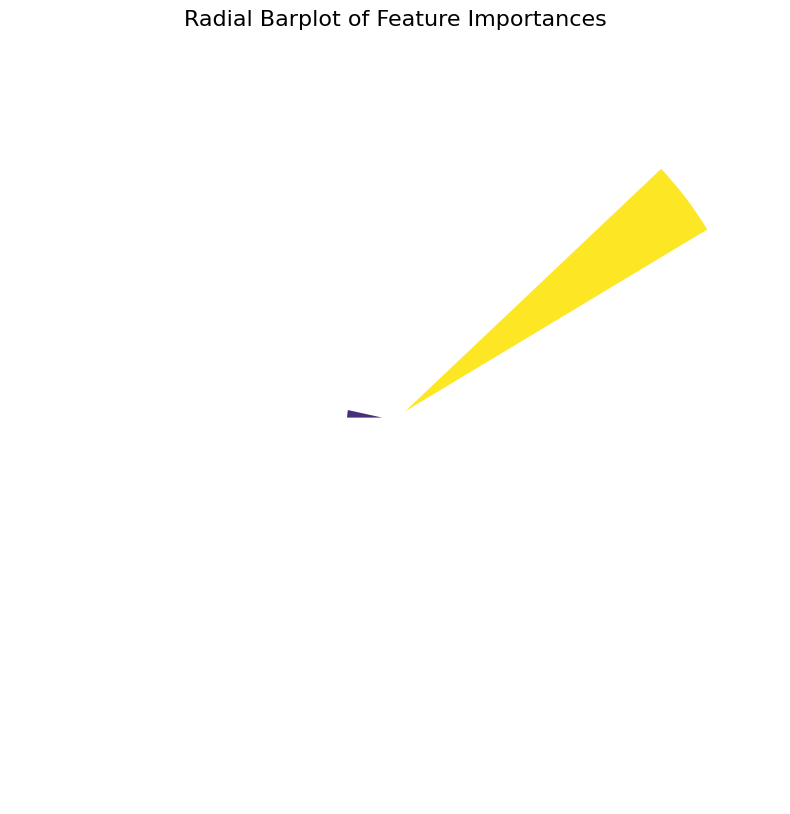

In [ ]:
"""
feature_importance_df = {
    "Feature": ['A', 'B', 'C', 'D', 'E', 'F'],
    "Importance": [0.1, 0.4, 0.2, 0.7, 0.3, 0.5]
}
"""
import pandas as pd
feature_importance_df = pd.DataFrame(feature_importance_df)

# Set the figure size and create a polar plot
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Remove grid for a cleaner look
plt.axis("off")

# Compute actual heights without artificial scaling
heights = feature_importance_df["Importance"]

# Calculate bar width and angles
num_bars = len(feature_importance_df)
width = 2 * np.pi / num_bars
angles = [n * width for n in range(num_bars)]

# Create the bars with true feature importances
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=0,  # No artificial lower limit for accurate scaling
    linewidth=2,
    edgecolor="white",
    color=plt.cm.viridis(heights / max(heights))  # Color based on importance
)

# Set feature labels around the plot
ax.set_xticks(angles)
ax.set_xticklabels(feature_importance_df["Feature"])

# Title and display
ax.set_title("Radial Barplot of Feature Importances", fontsize=16)
plt.show()

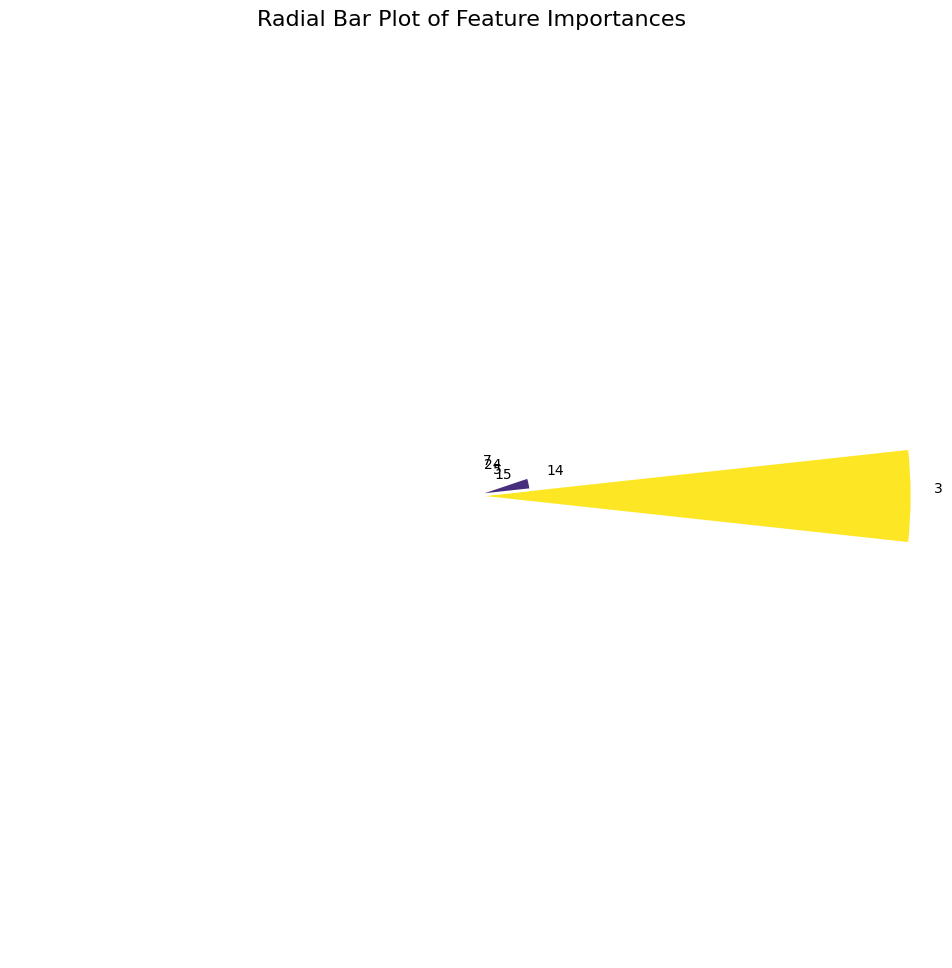

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Your dataset with index and values
data = {
    "Index": [3, 14, 15, 5, 24, 7, 17, 27, 26, 25, 23, 22, 21, 20, 19, 18, 0, 16, 1, 13, 12, 11, 10, 9, 8, 6, 4, 2, 28],
    "Importance": [0.837586, 0.112649, 0.016401, 0.011418, 0.011387, 0.010560, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}

# Convert to a DataFrame
df = pd.DataFrame(data)

# Set the figure size and create a polar plot
plt.figure(figsize=(12, 12))
ax = plt.subplot(111, polar=True)

# Remove grid for a cleaner look
plt.axis("off")

# Compute the angles and bar heights
num_bars = len(df)
angles = np.linspace(0, 2 * np.pi, num_bars, endpoint=False).tolist()
heights = df["Importance"].values

# Set the width of each bar
width = 2 * np.pi / num_bars

# Plot the bars without artificial lower limits
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=0,  # No artificial offset for true representation
    linewidth=2,
    edgecolor="white",
    color=plt.cm.viridis(heights / max(heights) if max(heights) > 0 else 1)
)

# Adding labels (only for non-zero values to avoid clutter)
for angle, height, idx in zip(angles, heights, df["Index"]):
    if height > 0:  # Avoid labeling zero values
        ax.text(angle, height + 0.05, str(idx), ha='center', va='bottom', fontsize=10)

# Title and display
ax.set_title("Radial Bar Plot of Feature Importances", fontsize=16)
plt.show()
